In [1]:
#https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html
import sklearn
import shap
import matplotlib.pyplot as plt
# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)
X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# linear model

In [2]:
#!pwd

In [3]:
# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [4]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


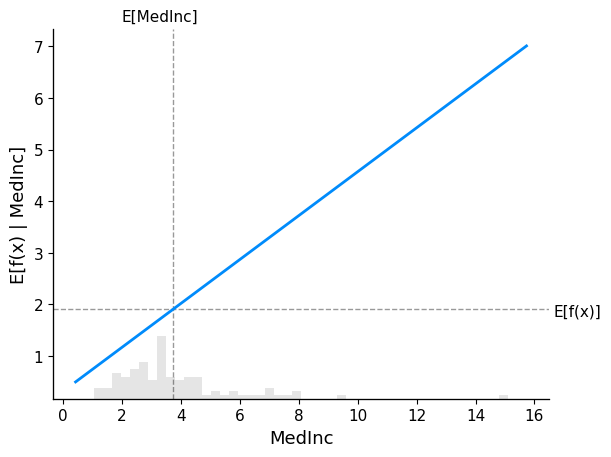

In [5]:
shap.partial_dependence_plot(
 "MedInc", 
model.predict,
X100, ice=False,
model_expected_value=True,
feature_expected_value=True, 
show=False
)
plt.savefig('partial_dependence_plot_lr_MedInc.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

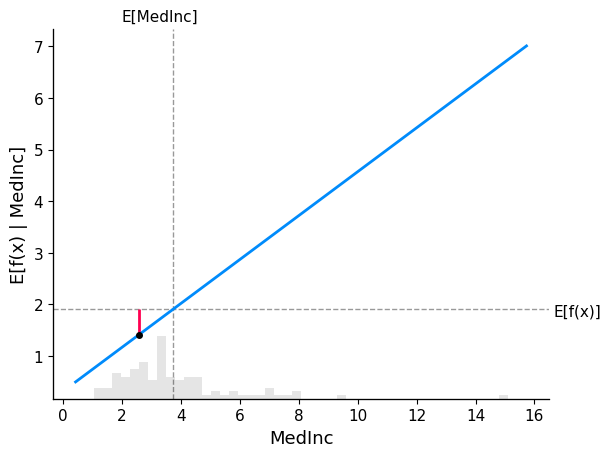

In [6]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
    show = False
)
plt.savefig("partial_dependence_plot_lr.png", format="png", bbox_inches="tight")
plt.show()
plt.close()

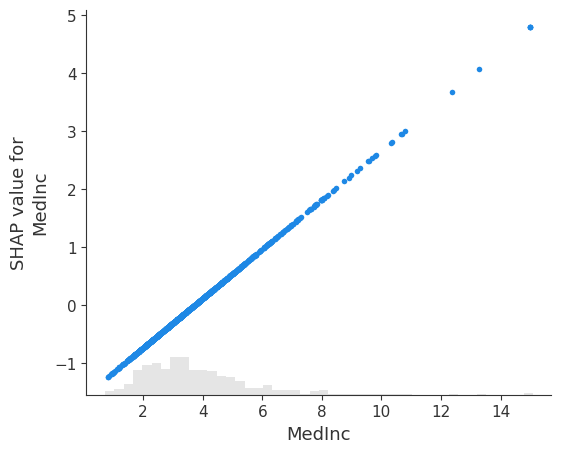

In [7]:
shap.plots.scatter(shap_values[:, "MedInc"], show =False)
#shap.plots.scatter(shap_values[:, "MedInc"], color=shap_values)
plt.savefig("scatter_plot_lr_MedInc.png", format="png", bbox_inches="tight")
plt.show()

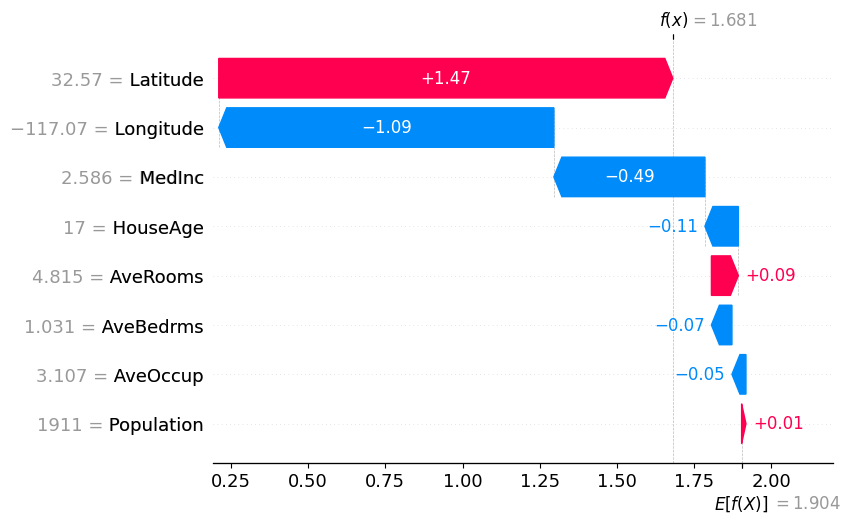

In [8]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14,show = False)
# Save the plot using plt.savefig
plt.savefig("waterfall_plot_lr.png", format="png", bbox_inches="tight")
plt.show()

# GAM model

In [9]:
# fit a GAM model to the data
import interpret.glassbox

model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "MedInc",
    model_ebm.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_ebm[sample_ind : sample_ind + 1, :],
)

# Save the plot as an image file
fig.savefig("partial_dependence_plot_with_shap_gam.png", format="png", bbox_inches="tight")
plt.close(fig)  # Close the figure after saving

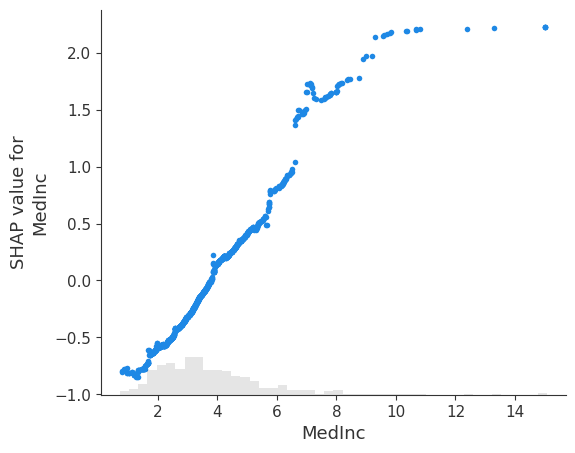

In [10]:
shap.plots.scatter(shap_values_ebm[:, "MedInc"], show =False)
plt.savefig("scatter_plot_lr_MedInc_GAM.png", format="png", bbox_inches="tight")
plt.show()

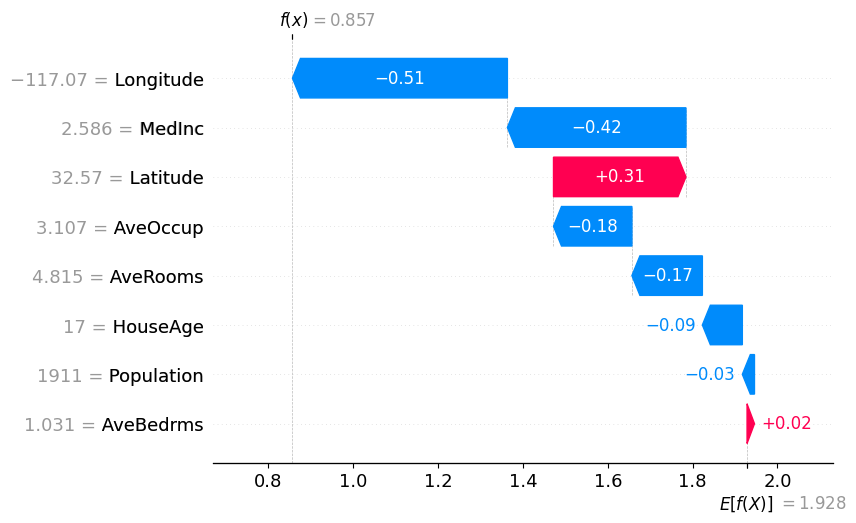

In [11]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind], show =False)
# Save the plot using plt.savefig
plt.savefig("waterfall_plot_GAM.png", format="png", bbox_inches="tight")
plt.show()



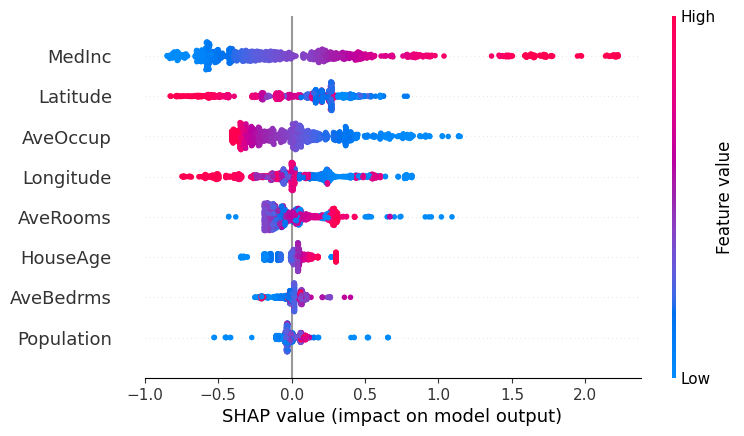

In [12]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values_ebm,show =False)

plt.savefig("beeswarm_plot_GAM.png", format="png", bbox_inches="tight")
plt.show()

# XGBOOST

In [13]:
# train XGBoost model
import xgboost

model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "MedInc",
    model_xgb.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_xgb[sample_ind : sample_ind + 1, :],
)
# Save the plot as an image file
fig.savefig("partial_dependence_plot_with_shap_XGBoost.png", format="png", bbox_inches="tight")
plt.close(fig)  # Close the figure after saving

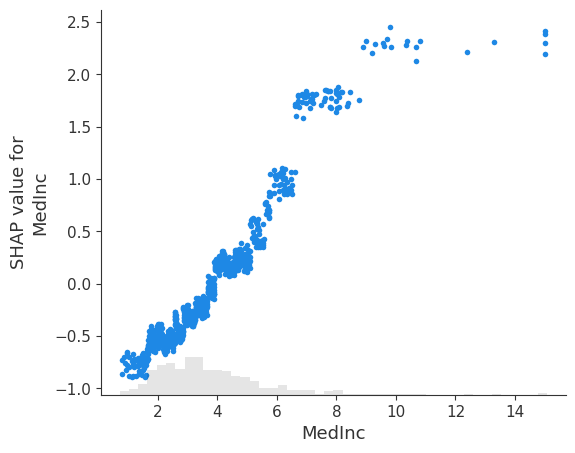

In [14]:
shap.plots.scatter(shap_values_xgb[:, "MedInc"], show = False)
plt.savefig("scatter_plot_xgb_MedInc.png", format="png", bbox_inches="tight")
plt.show()


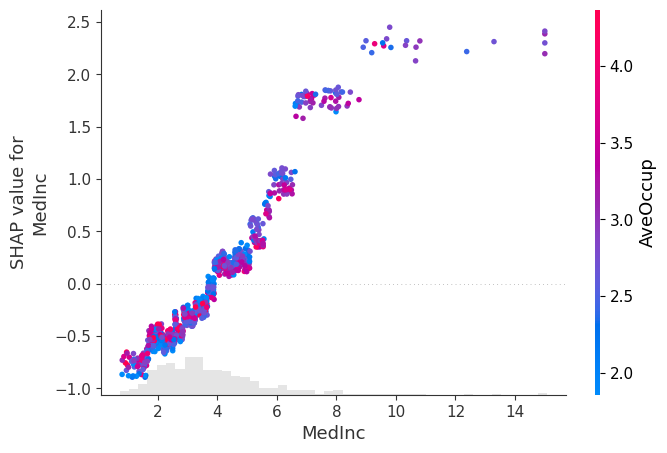

In [15]:
shap.plots.scatter(shap_values_xgb[:, "MedInc"], color=shap_values, show = False)
plt.savefig("scatter_plot_color_xgb_MedInc.png", format="png", bbox_inches="tight")
plt.show()

# Logistic Regression

In [16]:
# a classic adult census dataset price dataset
X_adult, y_adult = shap.datasets.adult()

# a simple linear logistic model
model_adult = sklearn.linear_model.LogisticRegression(max_iter=10000)
model_adult.fit(X_adult, y_adult)


def model_adult_proba(x):
    return model_adult.predict_proba(x)[:, 1]


def model_adult_log_odds(x):
    p = model_adult.predict_log_proba(x)
    return p[:, 1] - p[:, 0]

In [17]:
# make a standard partial dependence plot
sample_ind = 18
fig, ax = shap.partial_dependence_plot(
    "Capital Gain",
    model_adult_proba,
    X_adult,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    
)

fig.savefig("partial_dependence_plot_shap_logreg.png", format="png", bbox_inches="tight")
plt.close(fig)  # Close the figure after saving

In [18]:
# compute the SHAP values for the linear model
background_adult = shap.maskers.Independent(X_adult, max_samples=100)
explainer = shap.Explainer(model_adult_proba, background_adult)
shap_values_adult = explainer(X_adult[:1000])

PermutationExplainer explainer: 1001it [01:03, 14.00it/s]                       


In [19]:
# compute the SHAP values for the linear model
explainer_log_odds = shap.Explainer(model_adult_log_odds, background_adult)
shap_values_adult_log_odds = explainer_log_odds(X_adult[:1000])

PermutationExplainer explainer: 1001it [01:06, 12.46it/s]                       


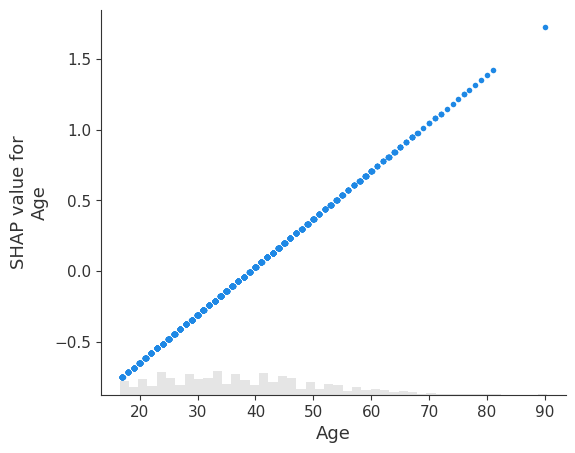

In [20]:
shap.plots.scatter(shap_values_adult_log_odds[:, "Age"], show =False)
plt.savefig("scatter_plot_color_logreg_MedInc.png", format="png", bbox_inches="tight")
plt.show()

In [21]:
# make a standard partial dependence plot
sample_ind = 18
fig, ax = shap.partial_dependence_plot(
    "Age",
    model_adult_log_odds,
    X_adult,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
)

fig.savefig("partial_dependence_plot_shap_logodd.png", format="png", bbox_inches="tight")
plt.close(fig)  # Close the figure after saving

In [22]:
# train XGBoost model
model = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X_adult, y_adult * 1)

# compute SHAP values
explainer = shap.Explainer(model, background_adult)
shap_values = explainer(X_adult)

# set a display version of the data to use for plotting (has string values)
shap_values.display_data = shap.datasets.adult(display=True)[0].values

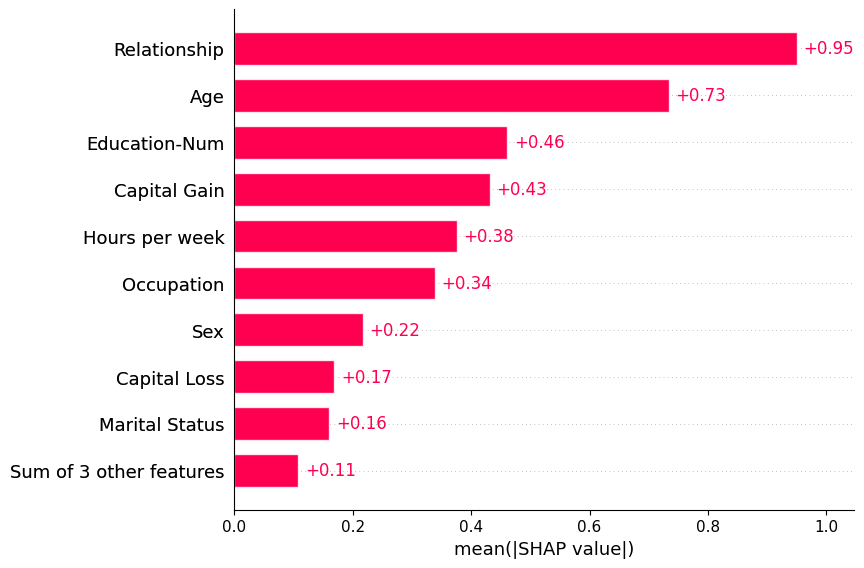

In [23]:
shap.plots.bar(shap_values,show=False)
plt.savefig("bar_plot_xgbclassifier.png", format="png", bbox_inches="tight")
plt.show()

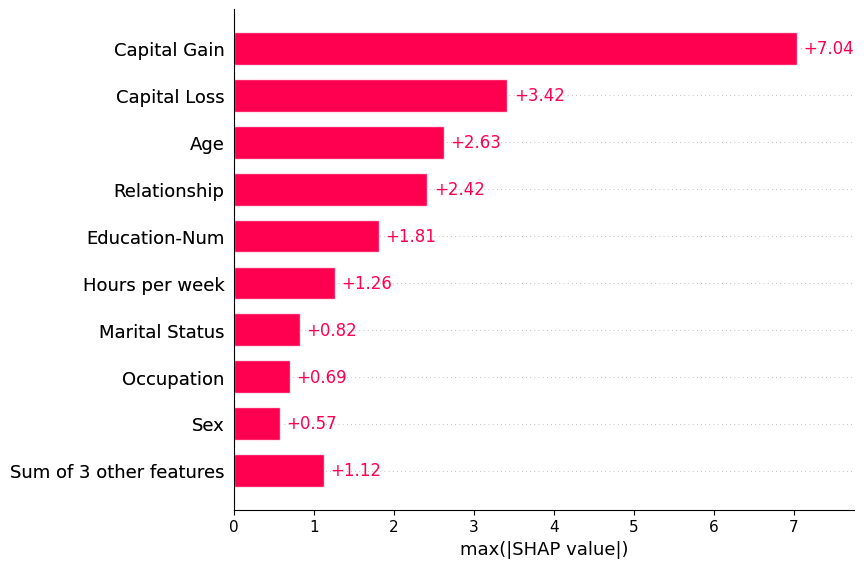

In [24]:
shap.plots.bar(shap_values.abs.max(0),show=False)
plt.savefig("bar_plot_abs_xgbclassifier.png", format="png", bbox_inches="tight")
plt.show()

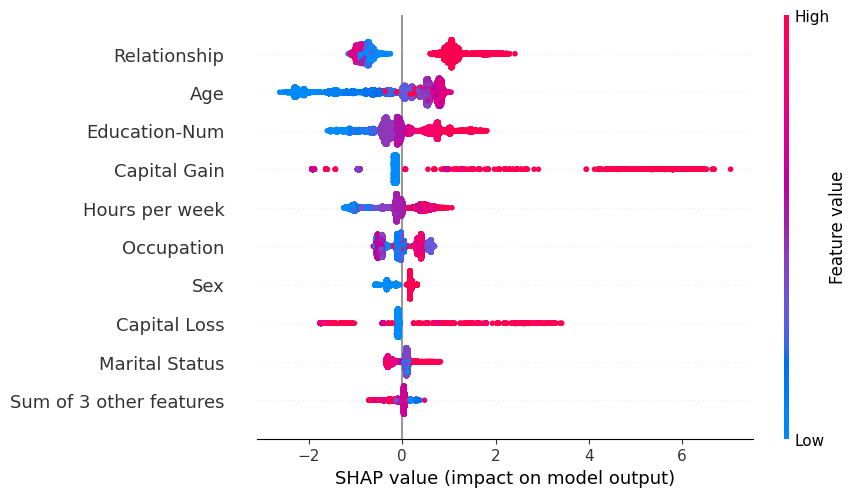

In [25]:
shap.plots.beeswarm(shap_values,show=False)
plt.savefig("beeswarm_plot_xgbclassifier.png", format="png", bbox_inches="tight")
plt.show()

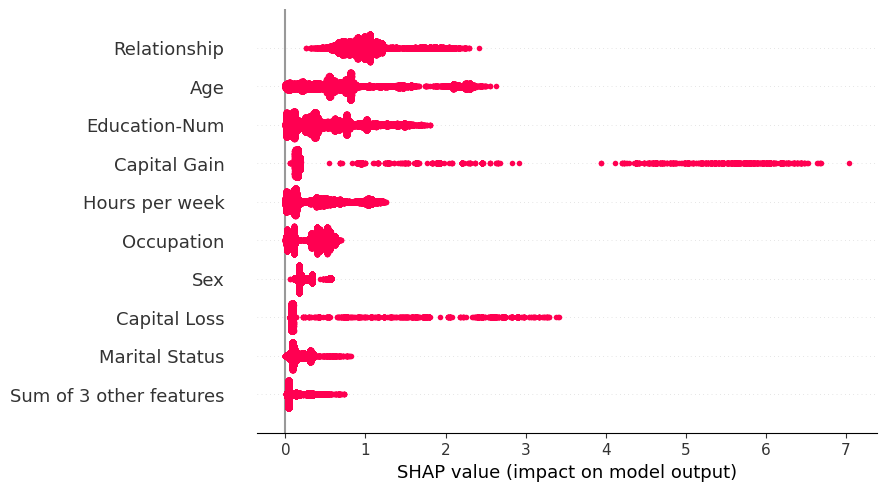

In [26]:
shap.plots.beeswarm(shap_values.abs, color="shap_red",show=False)
plt.savefig("beeswarm_plot_abs_xgbclassifier.png", format="png", bbox_inches="tight")
plt.show()

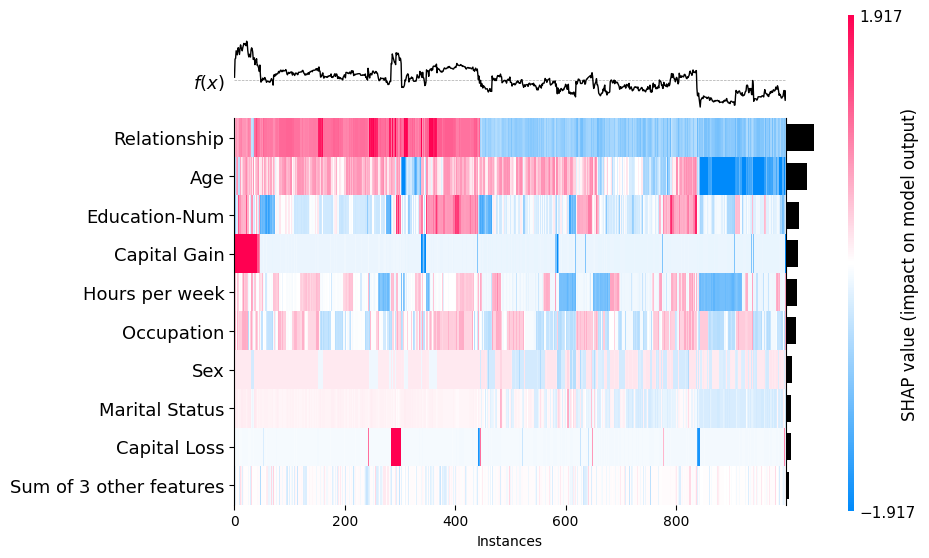

In [27]:
shap.plots.heatmap(shap_values[:1000],show=False)
plt.savefig("heatmap_xgbclassifier.png", format="png", bbox_inches="tight")
plt.show()

In [ ]:
shap.plots.scatter(shap_values[:, "Age"],show = False)
plt.savefig("scatterplot_xgbclassifier.png", format="png", bbox_inches="tight")
plt.show()

In [ ]:
shap.plots.scatter(shap_values[:, "Age"], color=shap_values,show = False)
plt.savefig("scatterplot_color_xgbclassifier.png", format="png", bbox_inches="tight")
plt.show()


In [ ]:
shap.plots.scatter(shap_values[:, "Age"], color=shap_values[:, "Capital Gain"], show =False)
plt.savefig("scatterplot_capitalgain_color_xgbclassifier.png", format="png", bbox_inches="tight")
plt.show()

In [ ]:
shap.plots.scatter(shap_values[:, "Relationship"], color=shap_values,show = False)
plt.savefig("scatterplot_relationship_color_xgbclassifier.png", format="png", bbox_inches="tight")
plt.show()

In [ ]:
clustering = shap.utils.hclust(X_adult, y_adult)
shap.plots.bar(shap_values, clustering=clustering, show = False)

plt.savefig("clustering.png", format="png", bbox_inches="tight")
plt.show()

In [ ]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.8, show =False)

plt.savefig("clustering_cutoff0.8.png", format="png", bbox_inches="tight")
plt.show()

In [ ]:
import transformers
import shap

# load a transformers pipeline model
model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# explain the model on two sample inputs
explainer = shap.Explainer(model)
shap_values = explainer(["What a great movie! ...if you have no taste."])

# visualize the first prediction's explanation for the POSITIVE output class
shap.plots.text(shap_values[0, :, "POSITIVE"])

In [ ]:
import xgboost
import shap
shap.initjs()

# train an XGBoost model
X, y = shap.datasets.california()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [ ]:
# visualize all the training set predictions
shap.plots.force(shap_values[:500])

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Latitude"], color=shap_values)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.backend as K
import numpy as np
import json
import shap

# load pre-trained model and choose two images to explain
model = VGG16(weights='imagenet', include_top=True)
X,y = shap.datasets.imagenet50()
to_explain = X[[39,41]]

# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)
e = shap.GradientExplainer(
    (model.layers[7].input, model.layers[-1].output),
    map2layer(X, 7),
    local_smoothing=0 # std dev of smoothing noise
)
shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=2)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)

In [ ]:
import sklearn
import shap
from sklearn.model_selection import train_test_split

# print the JS visualization code to the notebook
shap.initjs()

# train a SVM classifier
X_train,X_test,Y_train,Y_test = train_test_split(*shap.datasets.iris(), test_size=0.2, random_state=0)
svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train, Y_train)

# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

# plot the SHAP values for the Setosa output of all instances
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, link="logit")